In [1]:
#! /usr/bin/python2
# used for DATAFrames and DataFrames can hold different types data of multidimensional arrays.
import pandas as pd
# Numpy provides robust data structures for efficient computation of multi-dimensional arrays & matrices.
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sklearn.ensemble as ske
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv('D:\PBL6\Malware-Detection\Dataset\data.csv', sep='|')  # generate df as data
# now droping some coloumns as axis 1(mean coloumn) and will show the values in the rows
X = data.drop(['Name', 'md5', 'legitimate'], axis=1).values
y = data['legitimate'].values  # values of legitimate data

print('Researching important feature based on %i total features\n' %
      X.shape[1])  # shape() is use in pandas to give number of row/column

Researching important feature based on 54 total features



In [3]:
data

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [4]:
xx = data.drop(data.columns[[3,44]], axis=1)
xx

,Name,md5,Machine,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,258,9,0,361984,115712,0,6135,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,3330,9,0,130560,19968,0,81778,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,3330,9,0,517120,621568,0,350896,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,258,9,0,585728,369152,0,451258,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,258,9,0,294912,247296,0,217381,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,258,11,0,205824,223744,0,123291,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,33167,2,25,37888,185344,0,40000,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,258,10,0,118272,380416,0,59610,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,33166,2,25,49152,16896,0,51216,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [5]:
# Feature selection using Trees Classifier
fsel = ske.ExtraTreesClassifier().fit(X, y)
model = SelectFromModel(fsel, prefit=True)
X_new = model.transform(X)  # now features are only 9 
nb_features = X_new.shape[1]  # will save value 13 as shape is (138047, 13) 

# now converting in training and testing data in 20% range as total x is 138047 and testing is 138047*0.2=27610 
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.4)
features = []

print('%i features identified as important:' %
      nb_features)  # as mentioned above


# important features sored
indices = np.argsort(fsel.feature_importances_)[::-1][:nb_features]
for f in range(nb_features):
    print("%d. feature %s (%f)" % (
        f + 1, data.columns[2+indices[f]], fsel.feature_importances_[indices[f]]))

# mean adding to the empty 'features' array the 'important features'
# [::-1] mean start with last towards first
for f in sorted(np.argsort(fsel.feature_importances_)[::-1][:nb_features]):
    features.append(data.columns[2+f])
print(features)

12 features identified as important:
1. feature DllCharacteristics (0.150635)
2. feature Characteristics (0.119748)
3. feature Machine (0.104047)
4. feature VersionInformationSize (0.069009)
5. feature SectionsMaxEntropy (0.053157)
6. feature ImageBase (0.052592)
7. feature Subsystem (0.051651)
8. feature ResourcesMaxEntropy (0.050447)
9. feature MajorSubsystemVersion (0.043374)
10. feature ResourcesMinEntropy (0.042360)
11. feature SizeOfOptionalHeader (0.035120)
12. feature MajorOperatingSystemVersion (0.030267)
['Machine', 'SizeOfOptionalHeader', 'Characteristics', 'ImageBase', 'MajorOperatingSystemVersion', 'MajorSubsystemVersion', 'Subsystem', 'DllCharacteristics', 'SectionsMaxEntropy', 'ResourcesMinEntropy', 'ResourcesMaxEntropy', 'VersionInformationSize']


In [6]:
print(X_train)
print("------------")
print(X_test)
print("------------")
print(y_train)
print("------------")
print(y_test)

[[332.         224.         258.         ...   2.62307817   7.96700202
    0.        ]
 [332.         224.         258.         ...   2.45849223   7.99307001
   14.        ]
 [332.         224.         258.         ...   2.45849223   7.98793727
   14.        ]
 ...
 [332.         224.         258.         ...   2.45849223   5.31755236
   15.        ]
 [332.         224.         271.         ...   0.           0.
    0.        ]
 [332.         224.         271.         ...   0.           5.09998768
    0.        ]]
------------
[[3.32000000e+02 2.24000000e+02 3.31670000e+04 ... 2.41356665e+00
  5.05007355e+00 1.50000000e+01]
 [3.32000000e+02 2.24000000e+02 3.31670000e+04 ... 1.91924070e+00
  5.38283471e+00 1.30000000e+01]
 [3.32000000e+02 2.24000000e+02 2.58000000e+02 ... 2.15688868e+00
  5.15540854e+00 2.30000000e+01]
 ...
 [3.32000000e+02 2.24000000e+02 2.71000000e+02 ... 2.56193367e+00
  6.16607689e+00 1.40000000e+01]
 [3.44040000e+04 2.40000000e+02 8.22600000e+03 ... 1.62345088e+00


In [7]:
# Algorithm comparison
algorithms = {
    
    "DecisionTree": tree.DecisionTreeClassifier(max_depth=12),

    "RandomForest": ske.RandomForestClassifier(n_estimators=50),

    "GradientBoosting": ske.GradientBoostingClassifier(n_estimators=50),

    "AdaBoost": ske.AdaBoostClassifier(n_estimators=100)

}

In [18]:
results = {}
print("\nNow testing algorithms")
for algo in algorithms:
    clf = algorithms[algo]
    clf.fit(X_train, y_train)  # fit may be called as 'trained'
    score = clf.score(X_test, y_test)
    print("%s : %f %%" % (algo, score*100))
    results[algo] = score

print('results')
table = pd.DataFrame(data=results.items(),  columns=['Algorithms', 'Accuracy'])
print(table)

winner = max(results, key=results.get)
print('\nWinner algorithm is %s with a %f %% success' %
      (winner, results[winner]*100))


Now testing algorithms
DecisionTree : 99.052862 %
RandomForest : 99.357105 %
GradientBoosting : 98.804759 %
AdaBoost : 98.504138 %
results
         Algorithms  Accuracy
0      DecisionTree  0.990529
1      RandomForest  0.993571
2  GradientBoosting  0.988048
3          AdaBoost  0.985041

Winner algorithm is RandomForest with a 99.357105 % success


[Text(0, 0, '0.990529'),
 Text(0, 0, '0.993571'),
 Text(0, 0, '0.988048'),
 Text(0, 0, '0.985041')]

<Figure size 1200x800 with 0 Axes>

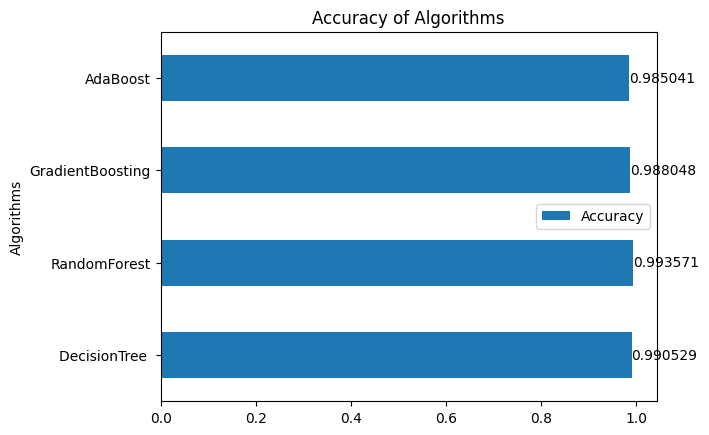

In [5]:
plt.figure(figsize=(12,8))
fig = table.plot(kind='barh', x='Algorithms', y='Accuracy')
plt.title('Accuracy of Algorithms')
# fig.set_xticklabels(results.keys())
fig.bar_label(fig.containers[0], label_type='edge')

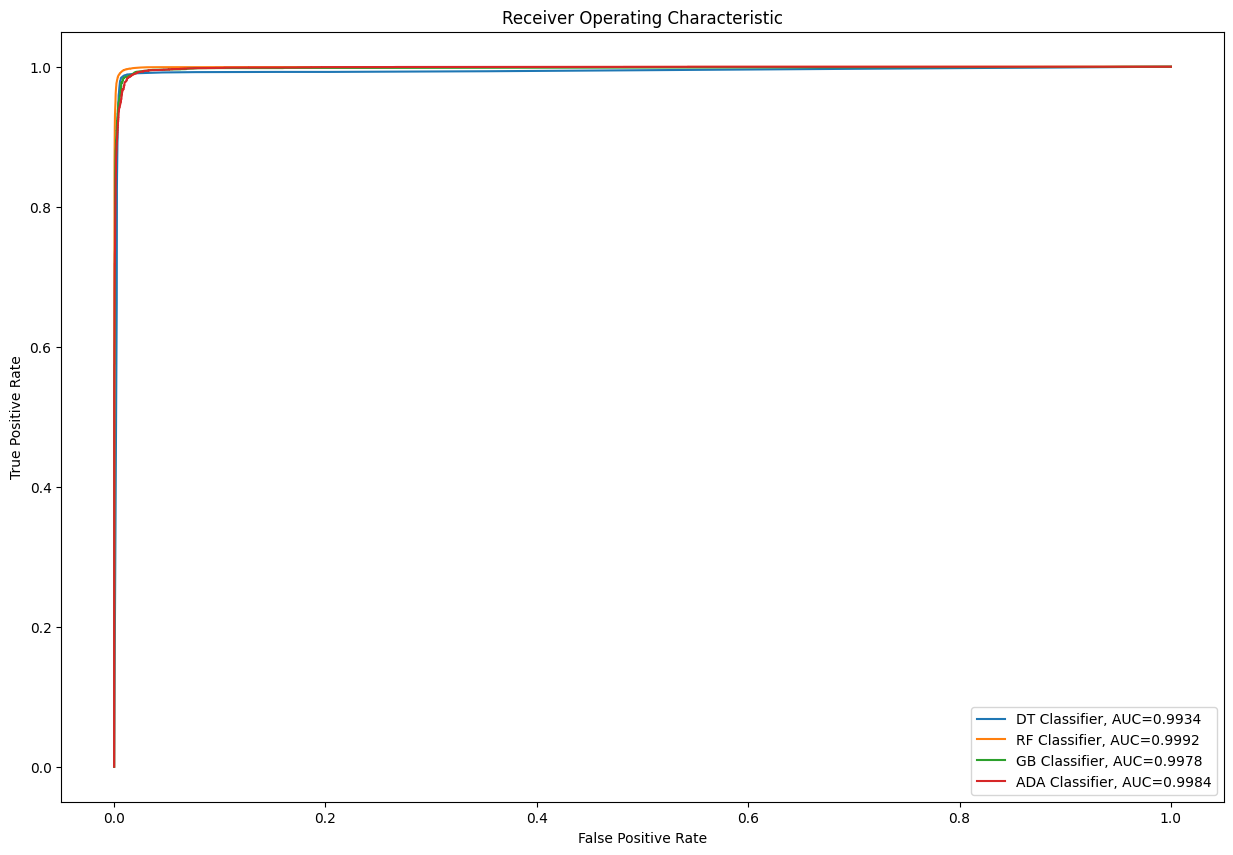

In [24]:
plt.figure(figsize=(15,10)).clf()

mod = tree.DecisionTreeClassifier(max_depth=12)
mod.fit(X_train, y_train)
y_predict = mod.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)
auc = round(metrics.roc_auc_score(y_test, y_predict), 4)
plt.plot(fpr,tpr,label="DT Classifier, AUC="+str(auc))

mod = ske.RandomForestClassifier(n_estimators=50)
mod.fit(X_train, y_train)
y_predict = mod.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)
auc = round(metrics.roc_auc_score(y_test, y_predict), 4)
plt.plot(fpr,tpr,label="RF Classifier, AUC="+str(auc))

mod = ske.GradientBoostingClassifier(n_estimators=50)
mod.fit(X_train, y_train)
y_predict = mod.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)
auc = round(metrics.roc_auc_score(y_test, y_predict), 4)
plt.plot(fpr,tpr,label="GB Classifier, AUC="+str(auc))

mod = ske.AdaBoostClassifier(n_estimators=100)
mod.fit(X_train, y_train)
y_predict = mod.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict)
auc = round(metrics.roc_auc_score(y_test, y_predict), 4)
plt.plot(fpr,tpr,label="ADA Classifier, AUC="+str(auc))

plt.title("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

In [11]:
results.values()

dict_values([99.05105126858508, 99.34623951900615, 98.80475923142397, 98.50413806841848])

In [13]:
# Save the algorithm and the feature list for later predictions
print('Saving algorithm and feature list in classifier directory...')
# Persist an arbitrary Python object into one file.
joblib.dump(algorithms[winner], 'classifier/classifier.pkl')
open('classifier/features.pkl', 'wb').write(pickle.dumps(features))
# joblib works especially well with NumPy arrays which are used by sklearn so depending on the classifier type you use you might have performance and size benefits using joblib.Otherwise pickle does work correctly so saving a trained classifier and loading it again will produce the same results no matter which of the serialization libraries you use
print('Saved')

Saving algorithm and feature list in classifier directory...
Saved


In [14]:
# Identify false and true positive rates
clf = algorithms[winner]
res = clf.predict(X_test)
mt = confusion_matrix(y_test, res)
# A confusion matrix, also known as an error matrix,[4] is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning.
print("False positive rate : %f %%" % ((mt[0][1] / float(sum(mt[0])))*100))
print('False negative rate : %f %%' % ((mt[1][0] / float(sum(mt[1]))*100)))

False positive rate : 0.483980 %
False negative rate : 1.049394 %
